In [124]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import math as math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error

#Graph Settings
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

name=["SKMS", "SKP","SLY4","SV-MIN","UNEDF0","UNEDF1",]


(40000,)


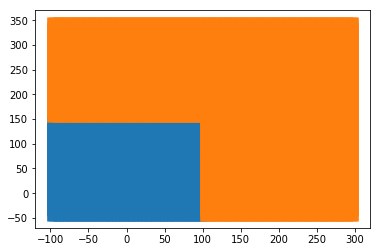

In [79]:
a=np.linspace(-100,100,200)
b=np.linspace(-50,150,200)

a_above=np.linspace(-100,300,400)
b_above=np.linspace(-50,350,400)


ab=[]
ab_above=[]

ab_target=[]
ab_above_target=[]




for i in a:
    for j in b:
        ab.append((i,j))

for i in ab:
    ab_target.append(i[0]+i[1]-50)
        

for i in a_above:
    for j in b_above:
        if i>a[-1] or j>b[-1]:
            ab_above.append((i,j))

for i in ab_above:
    ab_above_target.append(i[0]+i[1]-50)



print(np.shape(ab_target))

plt.plot(np.transpose(ab)[0],np.transpose(ab)[1],'x')
plt.plot(np.transpose(ab_above)[0],np.transpose(ab_above)[1],'x')

plt.show()


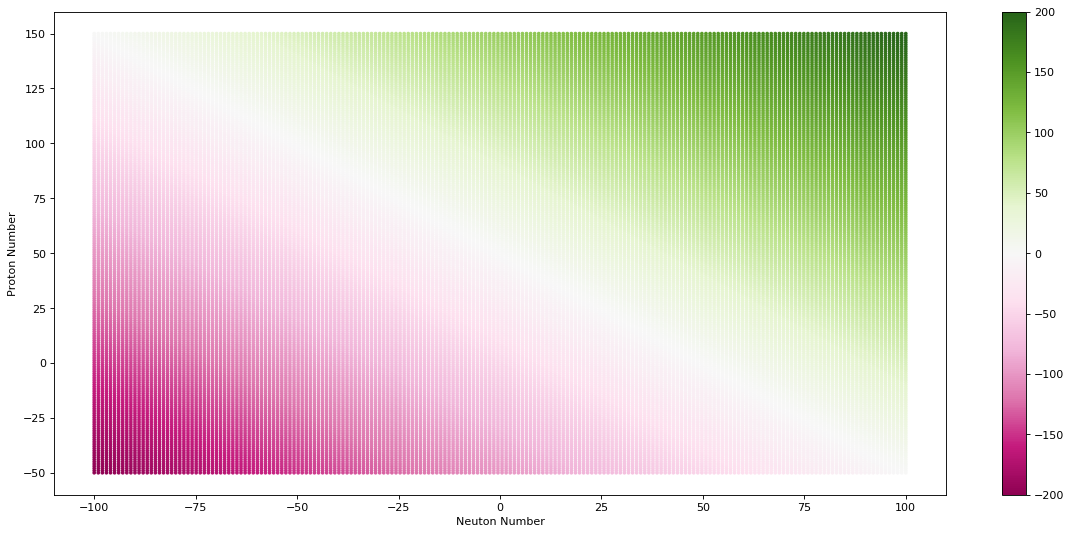

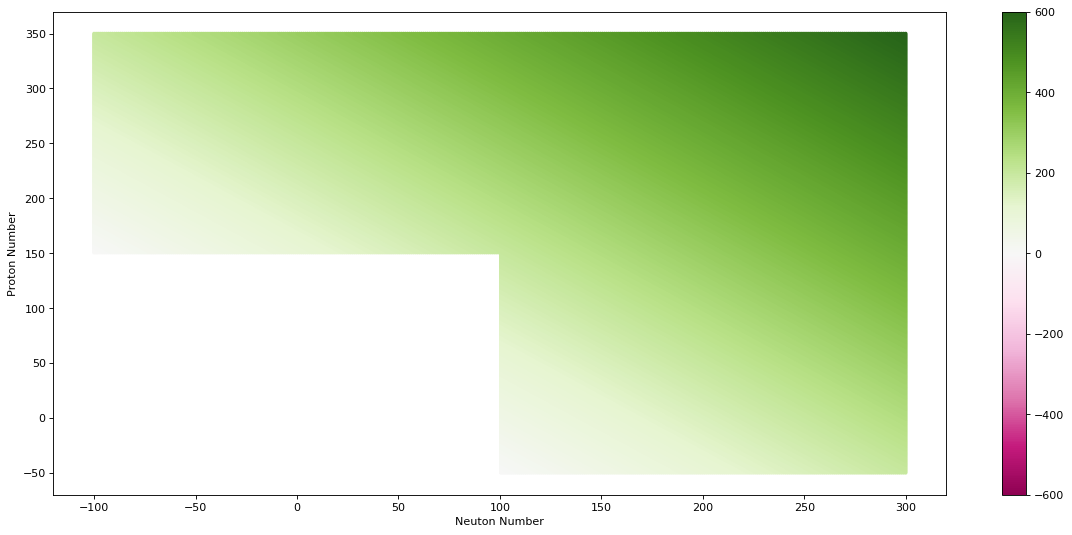

In [80]:
ext = np.int(np.ceil(max(-np.min(ab_target),np.max(ab_target))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(ab)[0],np.transpose(ab)[1],c=(ab_target),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.xlabel('Neuton Number')
plt.ylabel('Proton Number')
plt.colorbar(sc)
plt.show()

ext = np.int(np.ceil(max(-np.min(ab_above_target),np.max(ab_above_target))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(ab_above)[0],np.transpose(ab_above)[1],c=(ab_above_target),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.xlabel('Neuton Number')
plt.ylabel('Proton Number')
plt.colorbar(sc)
plt.show()



In [81]:
rf=RandomForestRegressor(n_estimators=100)#, bootstrap=False,)
X_train, X_test, y_train, y_test = train_test_split(ab, ab_target, test_size =0.05, random_state=42 )

rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

test_pred  =rf.predict(X_test)
train_pred =rf.predict(X_train)
all_pred   =rf.predict(ab)
above_pred =rf.predict(ab_above)

print(np.sqrt(mean_squared_error(test_pred,y_test)))
print(np.sqrt(mean_squared_error(train_pred,y_train)))
print(np.sqrt(mean_squared_error(above_pred,ab_above_target)))



0.9999985758048958
0.9999937419973866
0.20762466694295642
0.09786814529372298
156.96275695605354


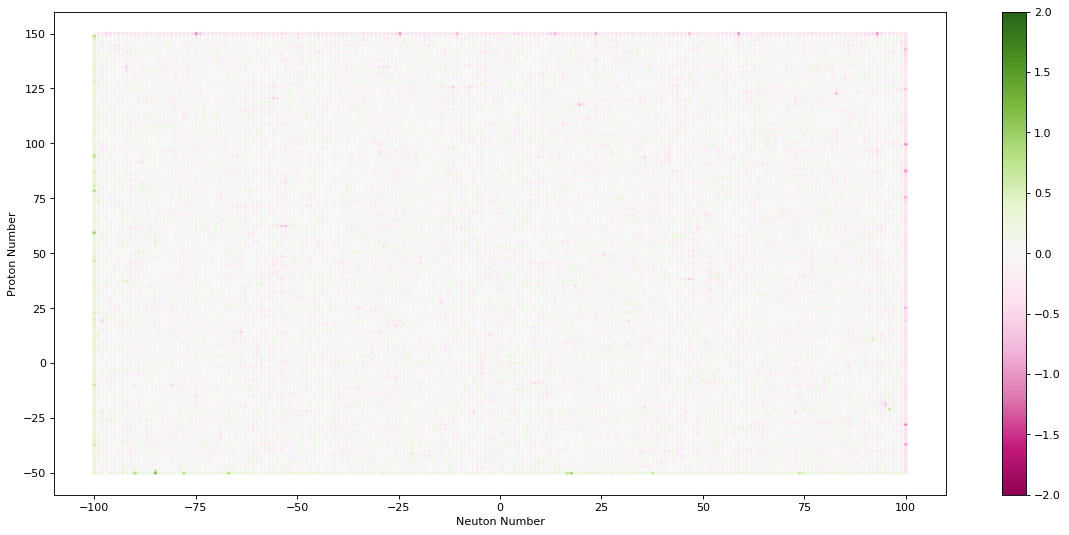

In [84]:
ext = np.int(np.ceil(max(-np.min(all_pred-ab_target),np.max(all_pred-ab_target))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(ab)[0],np.transpose(ab)[1],c=(all_pred-ab_target),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.xlabel('Neuton Number')
plt.ylabel('Proton Number')
plt.colorbar(sc)
plt.show()


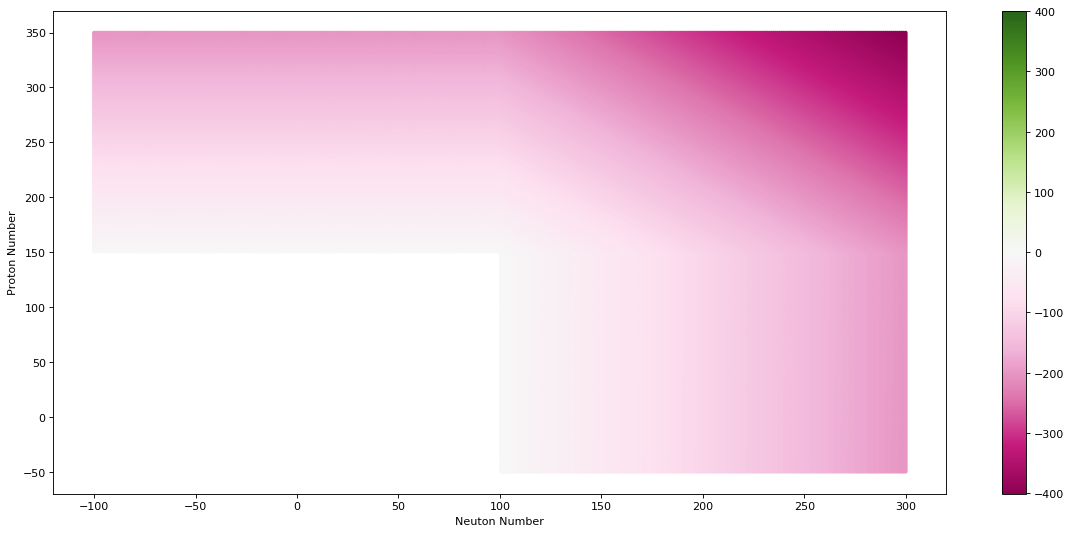

In [85]:
ext = np.int(np.ceil(max(-np.min(above_pred-ab_above_target),np.max(above_pred-ab_above_target))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(ab_above)[0],np.transpose(ab_above)[1],c=(above_pred-ab_above_target),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.xlabel('Neuton Number')
plt.ylabel('Proton Number')
plt.colorbar(sc)
plt.show()


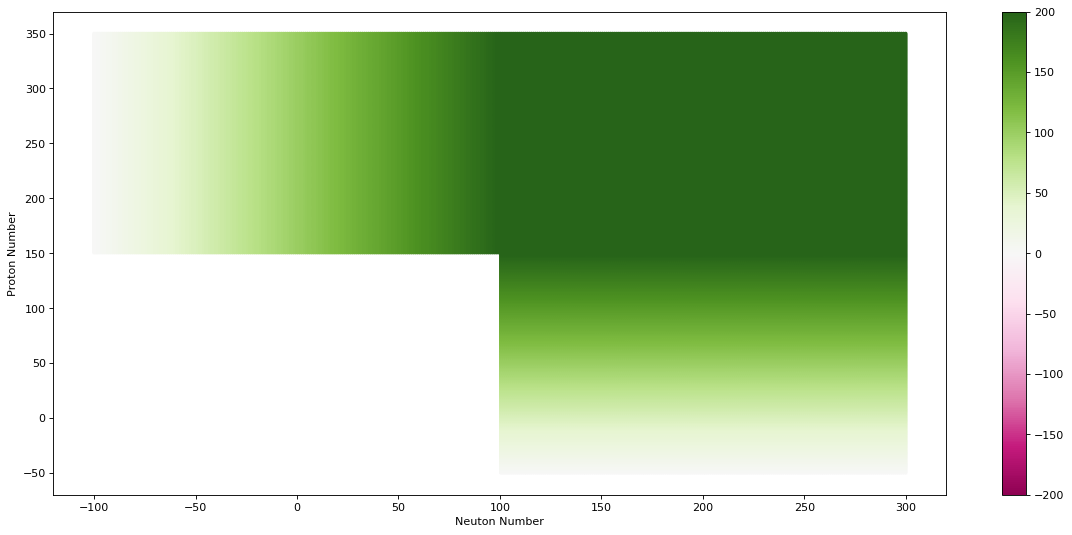

In [86]:
ext = np.int(np.ceil(max(-np.min(above_pred),np.max(above_pred))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(ab_above)[0],np.transpose(ab_above)[1],c=(above_pred),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.xlabel('Neuton Number')
plt.ylabel('Proton Number')
plt.colorbar(sc)
plt.show()


(121, 2)


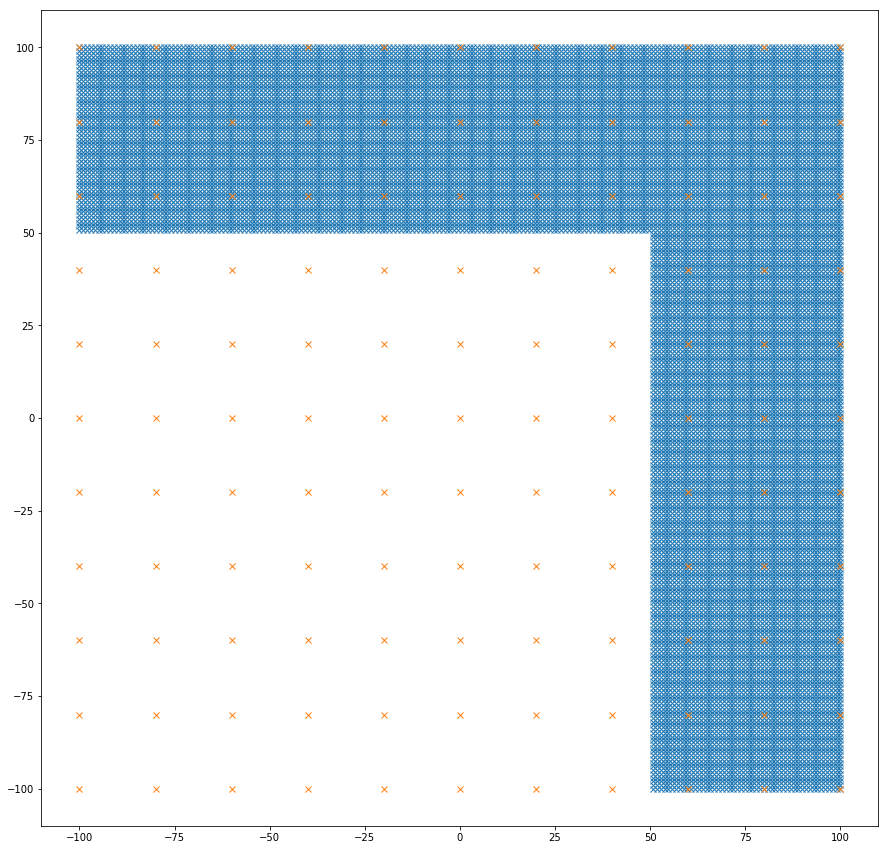

In [131]:
a=np.linspace(-100,100,200)
b=np.linspace(-100,100,200)

ab_co          =[]
ab_co_target   =[]
ab_ar          =[]
ab_ar_target   =[]

ab_all         =[]
ab_all_target  =[]




for i in a:
    for j in b:
        ab_all.append((i,j))
        if i>50 or j>50:
            ab_co.append((i,j))
        else:
            ab_ar.append((i,j))
            

refs=[]
for i in range(-100,101,20):
    for j in range(-100,101,20):
        refs.append((i,j))
    
    



ab_co_directions=[]
for i in ab_co:
    ab_co_target.append(i[0]-100+(i[1]*0.25))
    
    directions=[]
    
    for j in refs:
        width=j[0]-i[0]
        height=j[1]-i[1]
        length=np.sqrt((width**2) +(height**2))
        directions.append((width,height))
    ab_co_directions.append(directions)
    
    
ab_ar_directions=[]
for i in ab_ar:
    ab_ar_target.append(i[0]-100+(i[1]*0.25))
    
    directions=[]
    
    for j in refs:
        width=j[0]-i[0]
        height=j[1]-i[1]
        length=np.sqrt((width**2) +(height**2))
        directions.append((width,height))
    ab_ar_directions.append(directions)
    
    
    
for i in ab_all:
    ab_all_target.append(i[0]-100+(i[1]*0.25))

#ab_all=ab_all+ab_ar
#ab_all=ab_all+ab_co
#ab_all_target=ab_all_target+ab_co_target
#ab_all_target=ab_all_target+ab_ar_target
#ab_all_target.append(ab_ar_target)
#ab_all_target.append(ab_co_target)
print(np.shape(refs))
plt.plot(np.transpose(ab_co)[0],np.transpose(ab_co)[1], 'x')
plt.plot(np.transpose(refs)[0],np.transpose(refs)[1], 'x')

#plt.plot(np.transpose(ab_ar)[0],np.transpose(ab_ar)[1], 'x')
#plt.plot(np.transpose(ab_all)[0],np.transpose(ab_all)[1], 'x')
plt.show()

(121, 2)
(121, 2)


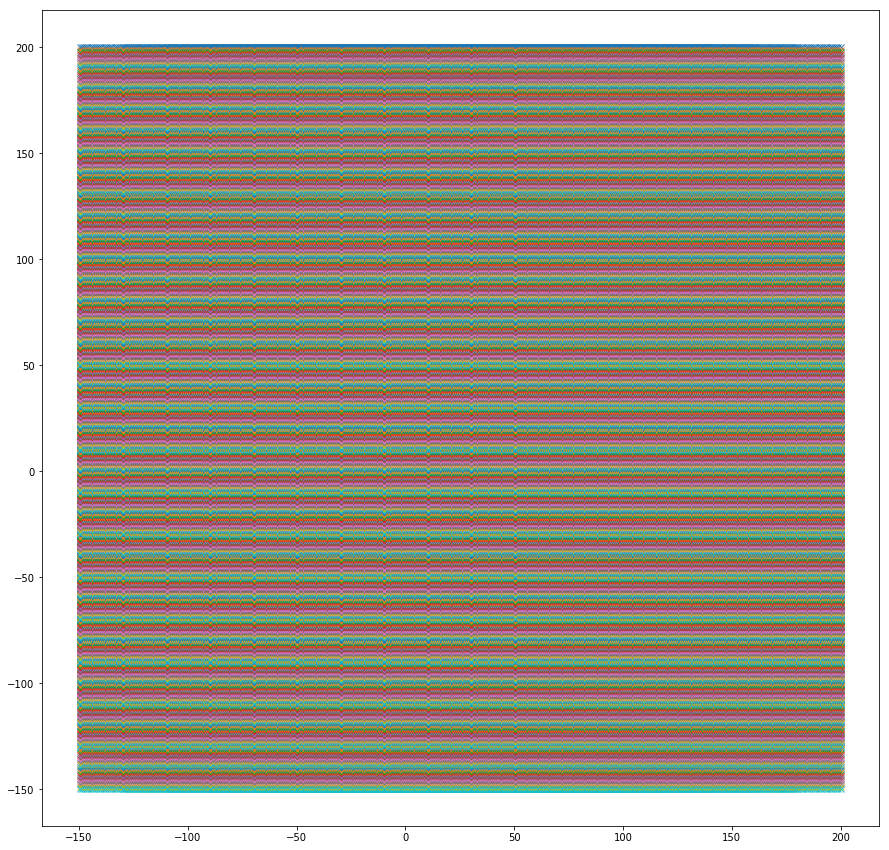

In [136]:
print(np.shape(ab_ar_directions[0]))
print(np.shape(ab_ar_directions[1]))
plt.plot(np.transpose(ab_ar_directions)[0],np.transpose(ab_ar_directions)[1], "x")
plt.show()


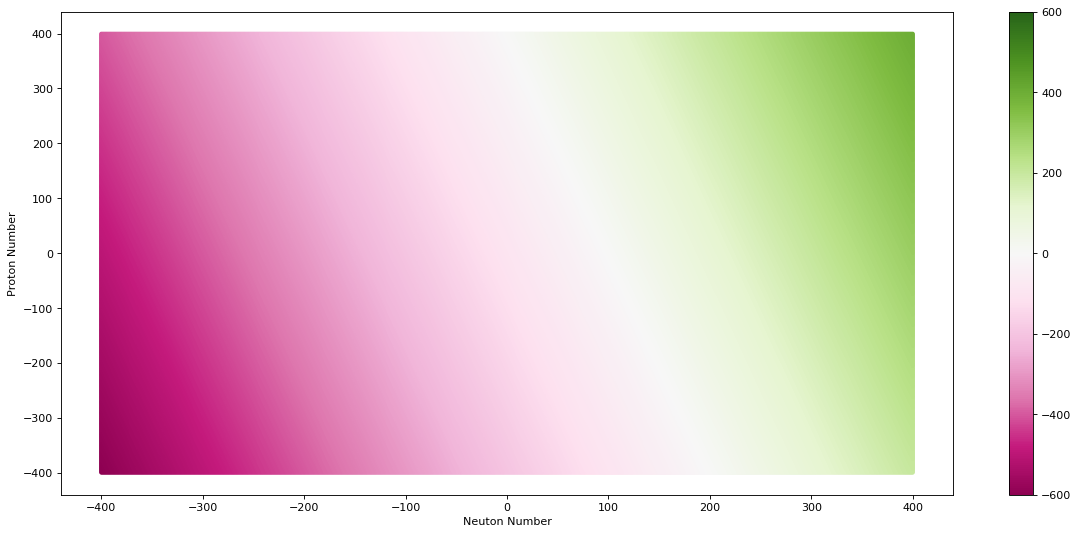

In [117]:
ext = np.int(np.ceil(max(-np.min(ab_all_target),np.max(ab_all_target))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(ab_all)[0],np.transpose(ab_all)[1],c=(ab_all_target),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.xlabel('Neuton Number')
plt.ylabel('Proton Number')
plt.colorbar(sc)
plt.show()


In [118]:
rf=RandomForestRegressor(n_estimators=100)#, bootstrap=False,)
X_train, X_test, y_train, y_test = train_test_split(ab_co, ab_co_target, test_size =0.25, random_state=42 )

rf.fit(X_train,y_train)
#print(rf.score(X_train,y_train))
#print(rf.score(X_test,y_test))

#test_pred  =rf.predict(X_test)
#train_pred =rf.predict(X_train)

#ar_pred    =rf.predict(ab_ar)
#co_pred    =rf.predict(ab_co)

all_pred   =rf.predict(ab_all)


#print(np.sqrt(mean_squared_error(train_pred,y_train)))
#print(np.sqrt(mean_squared_error(test_pred,y_test)))
#print(np.sqrt(mean_squared_error(ar_pred,ab_ar_target)))
#print(np.sqrt(mean_squared_error(co_pred,ab_co_target)))
print(np.sqrt(mean_squared_error(all_pred,ab_all_target)))


61.49012872216069


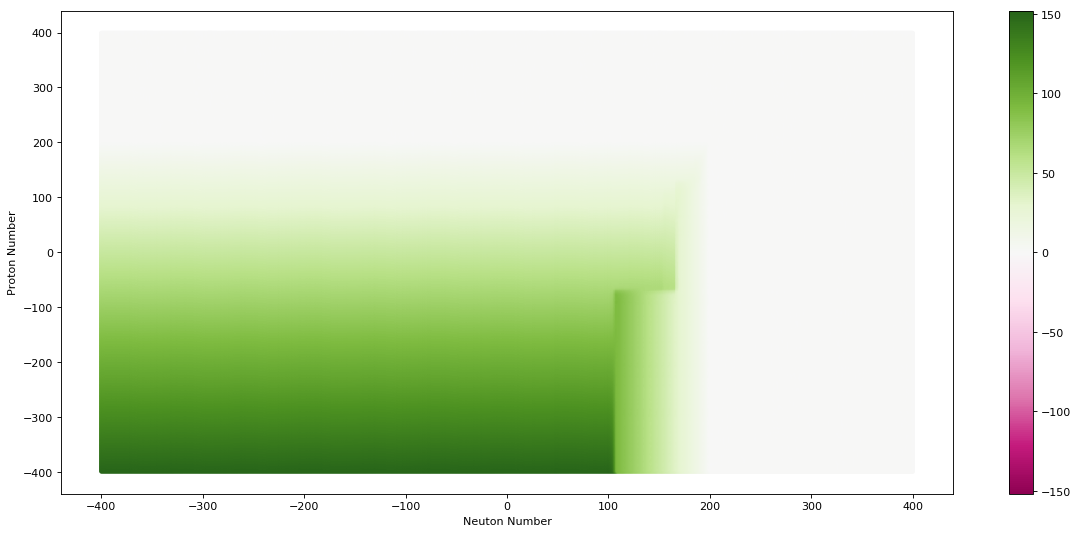

In [119]:
ext = np.int(np.ceil(max(-np.min(all_pred-ab_all_target),np.max(all_pred-ab_all_target))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(np.transpose(ab_all)[0],np.transpose(ab_all)[1],c=(all_pred-ab_all_target),cmap='PiYG',vmin=-ext,vmax=ext,s=5)
plt.xlabel('Neuton Number')
plt.ylabel('Proton Number')
plt.colorbar(sc)
plt.show()
